# Buckling prediction
This notebook is based on the dataset used in the research "Rajana, K., Tsavdaridis, K. D., & Koltsakis, E. (2020)" and evaluate the model accuracy.


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [73]:
fileName  = "CellularBeamsElastic.csv"
df = pd.read_csv(fileName)
df

,L,H,Do,WP,FW,led,TF,TW,Elastic Load
0,4000,700,560,56.00,162,488.0,15,9,112.8
1,4000,700,560,56.00,162,488.0,20,9,151.3
2,4000,700,560,56.00,162,488.0,25,9,175.4
3,4000,700,560,56.00,162,488.0,15,12,176.6
4,4000,700,560,56.00,162,488.0,20,12,228.9
...,...,...,...,...,...,...,...,...,...
3640,8000,420,247,121.03,270,196.5,20,12,143.6
3641,8000,420,247,121.03,270,196.5,25,12,187.5
3642,8000,420,247,121.03,270,196.5,15,15,112.2
3643,8000,420,247,121.03,270,196.5,20,15,157.7


In [74]:
# Pplit data into input (X) and output (y) variables
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

# Scale the data
from sklearn.preprocessing import MinMaxScaler
Xscaler = MinMaxScaler()
X = Xscaler.fit_transform(X)
Yscaler = MinMaxScaler()
y = Yscaler.fit_transform(pd.DataFrame(y))


# Pplit data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)



In [75]:
# define the keras model
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import plot_model

# Create the first model
"""
model = Sequential()
model.add(Dense(8, input_dim=8, activation='tanh'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
"""

# Add Dropout
"""
model = Sequential()
model.add(Dense(8, input_dim=8, activation='tanh'))
model.add(Dropout(0.2))  # Dropout layer with 20% of neurons dropped
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))  # Dropout after each hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
"""

# Adding Batch Normalization
model = Sequential()
model.add(Dense(8, input_dim=8, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

# Define the optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()


/home/dylan/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 489 (1.91 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 64 (256.00 B)

In [76]:
# Fit the keras model on the dataset
train = True
modelPath = "model.h5"
if train or not os.path.exists(modelPath):
    history = model.fit(X_train, y_train, epochs=120, batch_size=30, verbose=1)
else:
    model.load_weights(modelPath)

Epoch 1/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5129 - mean_squared_error: 0.5129
Epoch 2/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 3/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 4/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 5/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 6/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 7/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 8/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 9/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 10/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 11/120
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

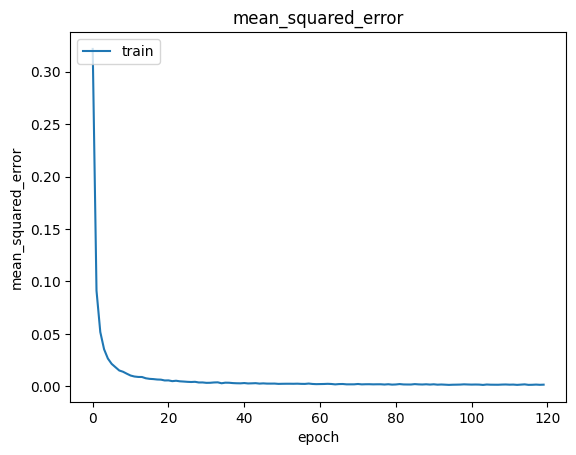

In [77]:
# Plot the loss during training
plt.plot(history.history['mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('mean_squared_error.png')
plt.show()

In [78]:
# Now create a list of input value to get the prediction
L = 4500
H = 650
Do = 560
WP = 56.00
FW = 162
led = 488.0
TF = 15
TW = 9

# Define new input parameters 
X_new = pd.DataFrame([[L, H, Do, WP, FW, led, TF, TW]], columns=['L', 'H', 'Do', 'WP', 'FW', 'led', 'TF', 'TW'])
X_new = Xscaler.fit_transform(X_new)

# predict
y_pred = model.predict(X_new)
y_pred0 = Yscaler.inverse_transform(y_pred).reshape(-1,1)

print(y_pred0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[176.31989]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


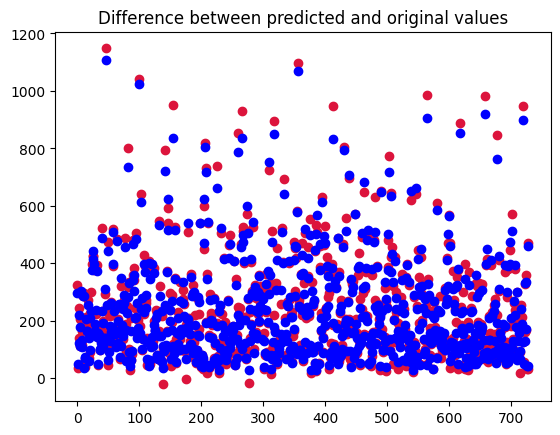

In [79]:
# Predicted results
y_pred_test = model.predict(X_test)
y_pred_test = Yscaler.inverse_transform(y_pred_test)

# Original from test
y_test_orig = Yscaler.inverse_transform(y_test)

# Create x-axis values as number of rows
x = range(len(y_test_orig))
plt.title(f'Difference between predicted and original values')
plt.scatter(x, y_pred_test, c='crimson')
plt.scatter(x, y_test_orig, c='blue')
plt.savefig('error_in_prediction.png')
plt.show()

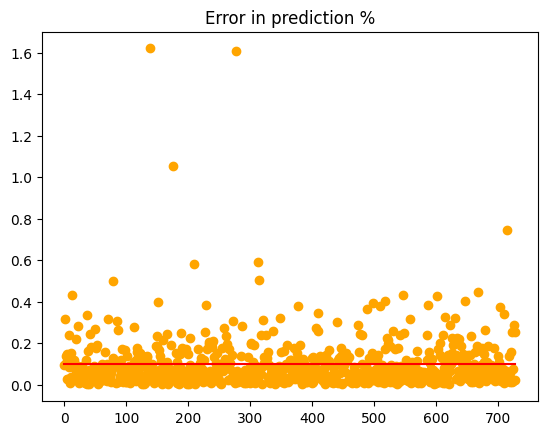

In [80]:
delta = []
for i in range(len(X_test)):
    delta.append(abs(y_pred_test[i] - y_test_orig[i]) / y_test_orig[i])

# Calculate the mean error
mean_error = sum(delta) / len(delta)

# Create x-axis values as number of rows
x = range(len(y_test_orig))
plt.scatter(x, delta, c='orange')
plt.plot(x, [mean_error] * len(x), c='red')
plt.title('Error in prediction %')
plt.savefig(f'error_in_prediction_%.png')
plt.show()
